### 무게를 찾기
- 목표 : 길이 피쳐를 사용해서 무게를 예측하기
- 데이터셋 : fish.csv
- 피쳐/속성 : Length
- 타겟/라벨 : Weight

In [592]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

[1] 데이터 준비 및 피쳐/타겟 분석

In [593]:
fish = pd.read_csv('../Data/fish.csv', usecols=[0,1,2])
fish = fish[fish['Species'] == 'Perch'].iloc[:,1:].reset_index(drop=True).copy()
fish

,Weight,Length
0,5.9,8.4
1,32.0,13.7
2,40.0,15.0
3,51.5,16.2
4,70.0,17.4
5,100.0,18.0
6,78.0,18.7
7,80.0,19.0
8,85.0,19.6
9,85.0,20.0


[1-1] 피쳐 분석 ==> 상관계수값, 시각화 2가지 모두 고려

In [594]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  56 non-null     float64
 1   Length  56 non-null     float64
dtypes: float64(2)
memory usage: 1.0 KB


In [595]:
fish['Length'].unique()

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21.3, 22. , 22.5, 22.7, 23. , 23.5, 24. , 24.6, 25. , 25.6, 26.5,
       27.3, 27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. ,
       39. , 40. , 42. , 43. , 43.5, 44. ])

In [596]:
fish['Weight'].unique()

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  135. ,  150. ,
        145. ,  170. ,  225. ,  188. ,  180. ,  197. ,  218. ,  300. ,
        260. ,  265. ,  250. ,  320. ,  514. ,  556. ,  840. ,  685. ,
        700. ,  690. ,  900. ,  650. ,  820. ,  850. , 1015. , 1100. ,
       1000. ])

In [597]:
cor = round(fish.corr(numeric_only=True).loc['Weight', 'Length'], 2)
cor

0.96

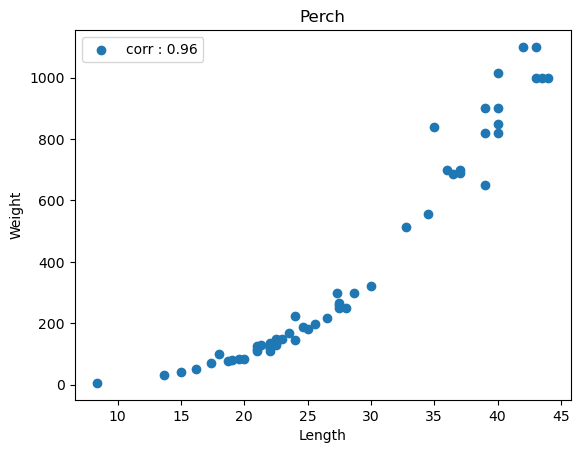

In [598]:
plt.scatter(fish['Length'], fish['Weight'], label = f"corr : {cor}")
plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('Perch')
plt.legend()
plt.show()

[2] 학습 준비
- 학습 알고리즘 : KNN Regressor
- 피쳐 스케일링
- 학습용/테스트용 데이터셋 분리

[2-1] 피쳐와 타겟 분리

In [599]:
feature = fish[['Length']]
target = fish['Weight']

print(f"feature : {feature.shape} , {feature.ndim}D")
print(f"target : {target.shape} , {target.ndim}D")

feature : (56, 1) , 2D
target : (56,) , 1D


[2-2] 학습용 & 테스트용 데이터셋 분리
* 전체 데이터셋 => 학습용 : 테스트용 = 75 : 25, 70 : 30
* 회귀 데이터셋 => 데이터셋 구성요소에 대한 비율 고려 X

In [600]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=42)

In [601]:
print(f"{X_train.shape}, {X_train.ndim}D")
print(f"{X_test.shape}, {X_test.ndim}D")

print(f"{y_train.shape}, {y_train.ndim}D")
print(f"{y_test.shape}, {y_test.ndim}D")

(42, 1), 2D
(14, 1), 2D
(42,), 1D
(14,), 1D


In [602]:
len(X_train) / len(feature), len(X_test) / len(feature)

(0.75, 0.25)

In [603]:
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

[2-3] 피쳐 스케일링

In [604]:
# 스케일러 인스턴스 생성
mm = MinMaxScaler()

In [605]:
# 스케일러에 데이터셋 전용의 속성값 설정
mm.fit(X_train)

MinMaxScaler()

In [606]:
mm.min_, mm.data_min_, mm.scale_, mm.data_max_

(array([-0.45214521]), array([13.7]), array([0.0330033]), array([44.]))

In [607]:
# 학습용, 테스트용 데이터셋 스케일링 진행
X_train_scaled = mm.transform(X_train)
X_test_scaled = mm.transform(X_test)

[3] 학습 진행

In [608]:
# 학습 모델 인스턴스 생성
model = KNeighborsRegressor()

# 학습용 데이터셋으로 학습 진행
model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [609]:
# 모델 파라미터 => 학습 후 즉, fit() 실행 후 설정되는 매개변수
model.n_features_in_, model.n_samples_fit_, model.effective_metric_, model.effective_metric_params_

(1, 42, 'euclidean', {})

[4] 최적의 K 찾기

In [610]:
scores = {}

for k in range(1, model.n_samples_fit_ + 1):
    # 최근접 이웃의 개수 설정 <== 모델 성능 좌우 : 하이퍼 파라미터
    model.n_neighbors = k

    # 성능 평가
    score = model.score(X_test_scaled, y_test)
    
    scores[k] = score

In [611]:
best_k = sorted(scores.items(), key = lambda x : x[1], reverse = True)[0][0]
best_k

5

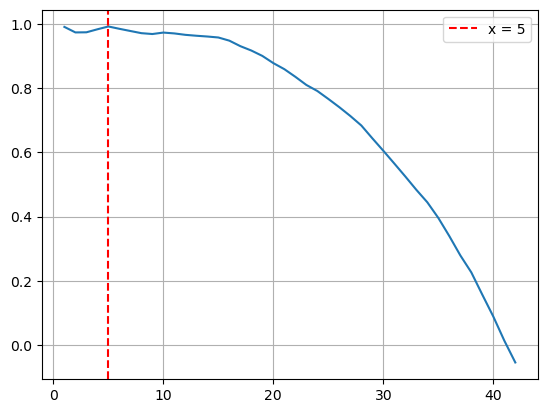

In [612]:
plt.plot(scores.keys(), scores.values())
plt.axvline(5, color = 'red', linestyle = '--', label = 'x = 5')
plt.grid()
plt.legend()
plt.show()

In [613]:
# 모델에 적용 => n_neighbors에 설정
model.n_neighbors = best_k

[5] 새로운 데이터의 무게 예측하기

In [614]:
new_length = input("농어 길이 : ")
print(f"new_length : {new_length}")

new_length : 44


In [615]:
# 2D, 스케일링 적용
new_length_df = pd.DataFrame([new_length], columns = ['Length'])

new_data_scaled = mm.transform(new_length_df)

In [616]:
new_data_scaled

array([[1.]])

In [617]:
# 예측
model.predict(new_data_scaled)

array([1010.])

In [618]:
distance, indexes = model.kneighbors(new_data_scaled)
distance, indexes

(array([[0.       , 0.0330033, 0.0330033, 0.0660066, 0.1320132]]),
 array([[34, 14,  8, 40,  6]]))

In [619]:
X_train.iloc[indexes.reshape(-1), :]

,Length
34,44.0
14,43.0
8,43.0
40,42.0
6,40.0


In [620]:
neighbor = y_train[indexes.reshape(-1)]
neighbor

34    1000.0
14    1100.0
8     1000.0
40    1100.0
6      850.0
Name: Weight, dtype: float64

In [621]:
neighbor.values.mean()

1010.0

#### KNN Regressor 문제점/단점

In [627]:
# 임의의 데이터
new_length = 1

# 2D DataFrame
dataDF = pd.DataFrame([[new_length]], columns = ['Length'])
# 피쳐 스케일링
data_scaled = mm.transform(dataDF)

model.predict(data_scaled)

array([60.])

=> 학습 데이터셋의 범위를 벗어난 더 큰 데이터, 더 작은 데이터의 경우  
정확한 예측 불가!!